In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm

In [64]:
experiment = '6'
first = f'{experiment}.1'
second = f'{experiment}.2'
third = f'{experiment}.3'
name = 'online-agent-percentage'

In [65]:
data1 = pd.read_csv('experiments/baseline-experiment.csv', skiprows=6)
data2 = pd.read_csv(f'experiments/experiment {first}.csv', skiprows=6)
data3 = pd.read_csv(f'experiments/experiment {second}.csv', skiprows=6)
data4 = pd.read_csv(f'experiments/experiment {third}.csv', skiprows=6)

In [66]:
def extract_steps_opinions(data, run_number):
    run_data = data[data['[run number]'] == run_number]
    steps = []
    opinions = []
    for _, row in run_data.iterrows():
        step = row['[step]']
        current_opinions = list(map(float, row['[opinion] of turtles'].strip('[]').split()))
        steps.extend([step] * len(current_opinions))
        opinions.extend(current_opinions)
    return steps, opinions

steps1, opinions1 = extract_steps_opinions(data1, 1)
steps2, opinions2 = extract_steps_opinions(data2, 3)
steps3, opinions3 = extract_steps_opinions(data3, 3)
steps4, opinions4 = extract_steps_opinions(data4, 4)

In [67]:
colours = [(1, 1, 1, 0), (0.75, 0.75, 0.75, 1), (0, 0, 0, 1)]  # Adding alpha transparency to white
cmap_name = 'custom_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colours, N=100)

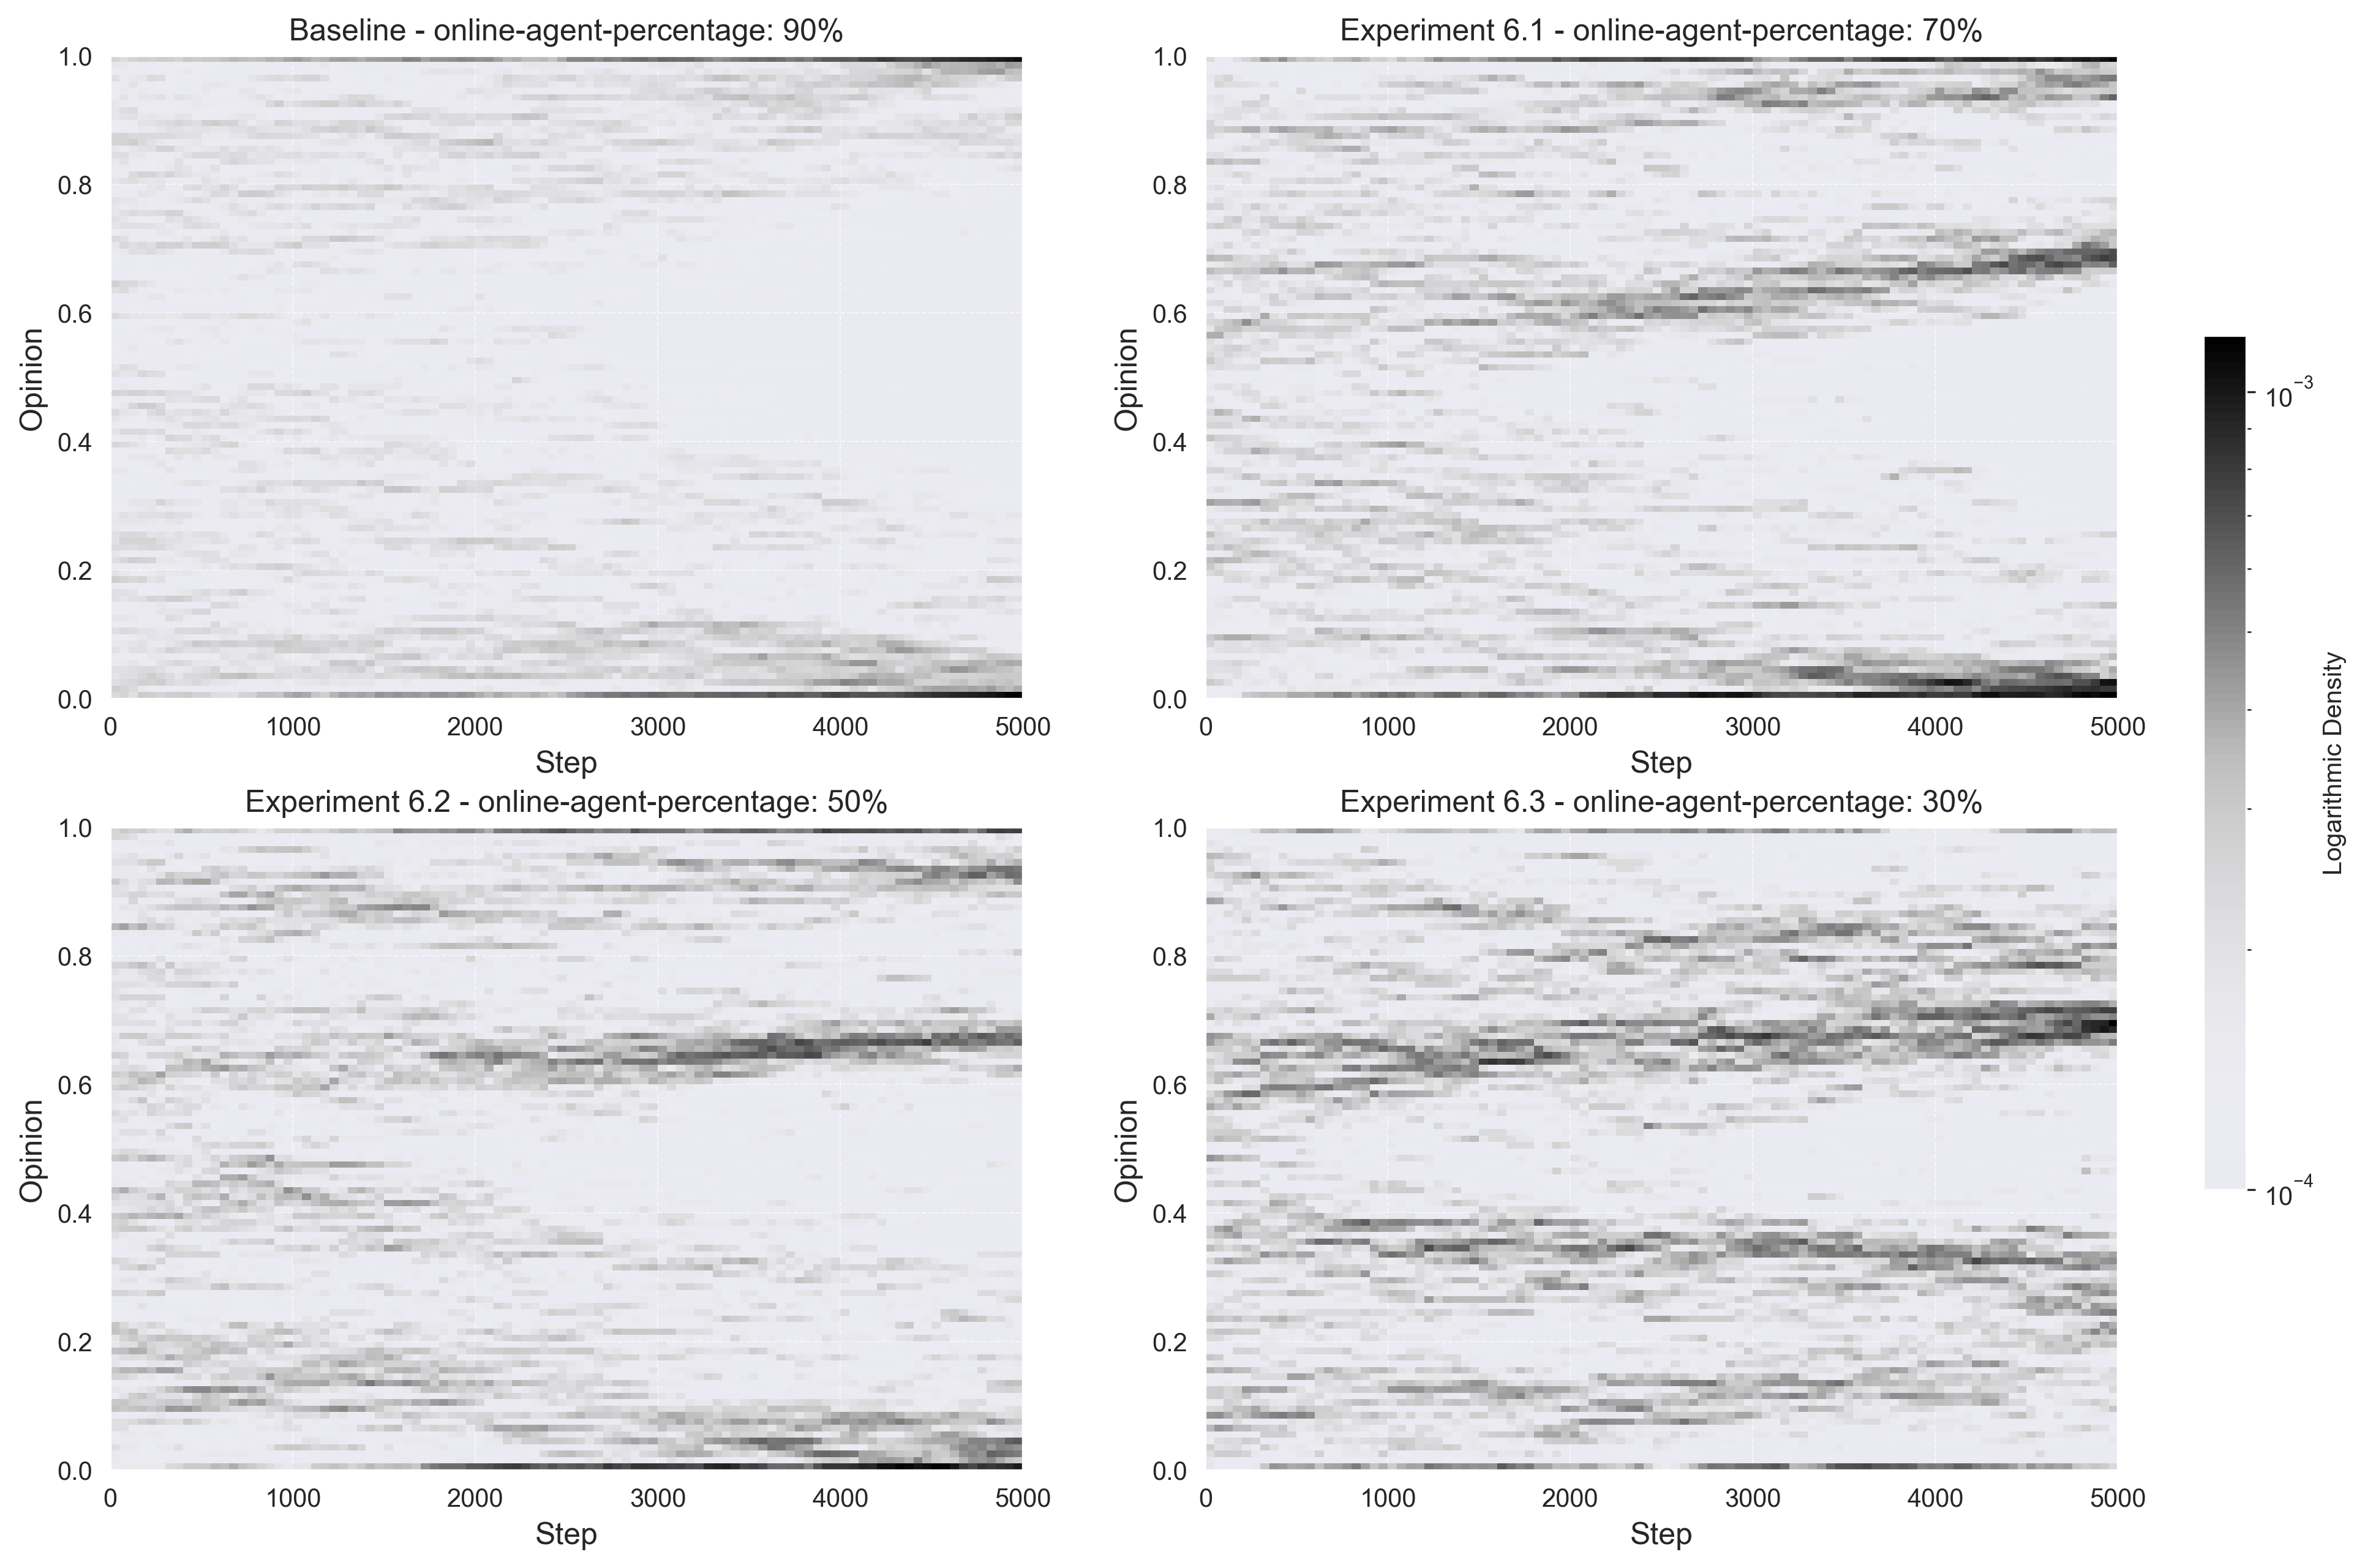

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=300)

datasets = [(steps1, opinions1, f'Baseline - {name}: 90%'), 
            (steps2, opinions2, f'Experiment {first} - {name}: 70%'), 
            (steps3, opinions3, f'Experiment {second} - {name}: 50%'), 
            (steps4, opinions4, f'Experiment {third} - {name}: 30%')]

for ax, (steps, opinions, title) in zip(axs.flat, datasets):
    histogram, xedges, yedges, image = ax.hist2d(steps, opinions, bins=[100, 100], cmap=cmap, norm=LogNorm(vmin=1e-4), density=True)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Opinion', fontsize=12)
    ax.set_title(title)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

cbar = fig.colorbar(image, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Logarithmic Density')
# fig.suptitle(f'Experiment 1: Varying {name}', fontsize=16)
plt.savefig(f'plots/subplots/experiment-{experiment}-{name}.png', dpi=300)
plt.show()